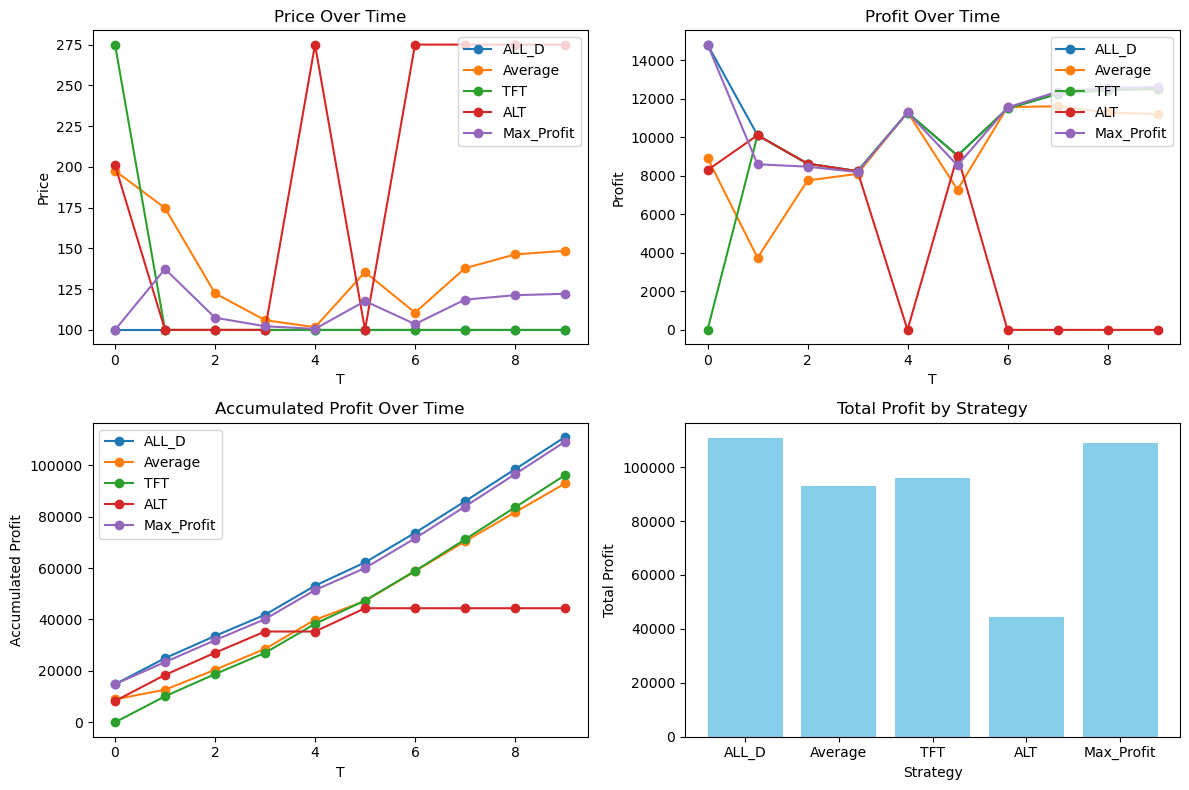

In [7]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

c = 10
p_nash = 100
p_monopoly = 275
strategy = ["ALL_D", "Average", 'TFT', 'ALT', 'Max_Profit']

#Profit function
def profit(i, p_list): 
    Q = 110 - 6 * (p_list[i]) / 5 + np.sum(p_list) / 5
    p_i = p_list[i]
    return Q * (p_i - c)
    
#ALL-D strategy:set price at nash equilibrium level in each period
def ALL_D(): 
    return p_nash
    
#TFT strategy: Start by cooperate (setting price at the monopoly level), 
#then choose the minimum price in the previous period
def TFT(p_list,i): 
    return np.min(np.concatenate((p_list[0:i],p_list[i+1:])))

def AlT():
    p=np.random.rand(1)
    if p>0.8:
        return p_nash
    else:
        return p_monopoly
    

#Random strategy: Choose a random price between the nash equilibrium level and the monopoly level
def random():
    return np.random.uniform(p_nash, p_monopoly)

#Average strategy: Choose the average price of the previous round
def avg(p_list):
    return np.mean(p_list)
    
#Max_Profit strategy: set the price that maximize the profit in response to the prices set by other firms in the previous round
def max_profit(i, p_list):
    def profit_function(p_i):
        temp_p_list = p_list.copy()
        temp_p_list[i] = p_i
        return -profit(i, temp_p_list) #concave max= -convex min
    result = minimize_scalar(profit_function, bounds=(c, p_monopoly), method='bounded')
    return result.x  

def play_5_different(p_nash, p_monopoly, c):
    T = 10
    profit_matrix = np.zeros((5, T))  
    price_matrix = np.zeros((5, T))  
    accumulated_profit_matrix = np.zeros((5, T)) 

    p_list = [p_nash, np.random.uniform(p_nash, p_monopoly), p_monopoly, np.random.uniform(p_nash, p_monopoly), p_nash]
    
    for i in range(5):
        profit_i = profit(i, p_list)
        if profit_i > 0:
            profit_matrix[i, 0] = profit_i
        price_matrix[i, 0] = p_list[i]
        accumulated_profit_matrix[i, 0] = profit_matrix[i, 0]

    for k in range(1, T):
        p_list = [p_nash, avg(p_list), TFT(p_list,3), AlT(), max_profit(4, p_list)]
        for i in range(5):
            profit_i = profit(i, p_list)
            if profit_i > 0:
                profit_matrix[i, k] = profit_i
            price_matrix[i, k] = p_list[i]
            accumulated_profit_matrix[i, k] = accumulated_profit_matrix[i, k-1] + profit_matrix[i, k]

    return profit_matrix, price_matrix, accumulated_profit_matrix

# Run the simulation
profit_matrix, price_matrix, accumulated_profit_matrix = play_5_different(p_nash, p_monopoly, c)
total_profit=[]
for i in range (5):
    total_profit.append(np.sum(profit_matrix[i]))
# Plot Price Over Periods
ig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Price Over Periods
axs[0, 0].set_title("Price Over Time")
for i in range(5):
    axs[0, 0].plot(np.arange(10), price_matrix[i],'-o', label=strategy[i])
axs[0, 0].set_xlabel("T")
axs[0, 0].set_ylabel("Price")
axs[0, 0].legend(loc='upper right')

# Plot Profit Over Periods
axs[0, 1].set_title("Profit Over Time")
for i in range(5):
    axs[0, 1].plot(np.arange(10), profit_matrix[i], '-o', label=strategy[i])
axs[0, 1].set_xlabel("T")
axs[0, 1].set_ylabel("Profit")
axs[0, 1].legend(loc='upper right')

# Plot Accumulated Profit Over Time
axs[1, 0].set_title("Accumulated Profit Over Time")
for i in range(5):
    axs[1, 0].plot(np.arange(10), accumulated_profit_matrix[i], '-o', label=strategy[i])
axs[1, 0].set_xlabel("T")
axs[1, 0].set_ylabel("Accumulated Profit")
axs[1, 0].legend(loc='upper left')

# Plot Total Profit as a Bar Chart
axs[1, 1].bar(strategy, total_profit, color='skyblue')
axs[1, 1].set_title("Total Profit by Strategy")
axs[1, 1].set_xlabel("Strategy")
axs[1, 1].set_ylabel("Total Profit")

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Firm 2 and 5 play p_nash in T=1, rest firms play p_monopoly in T=1


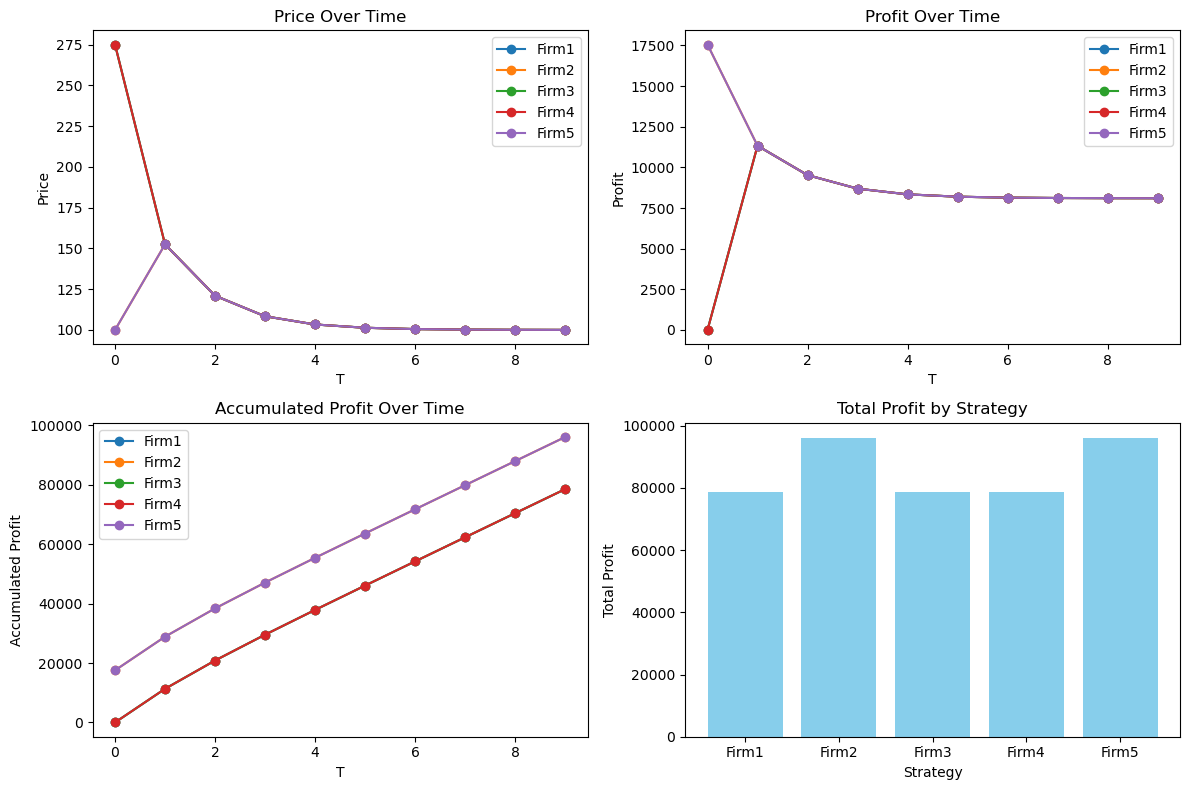

All Firm play p_monopoly in T=1


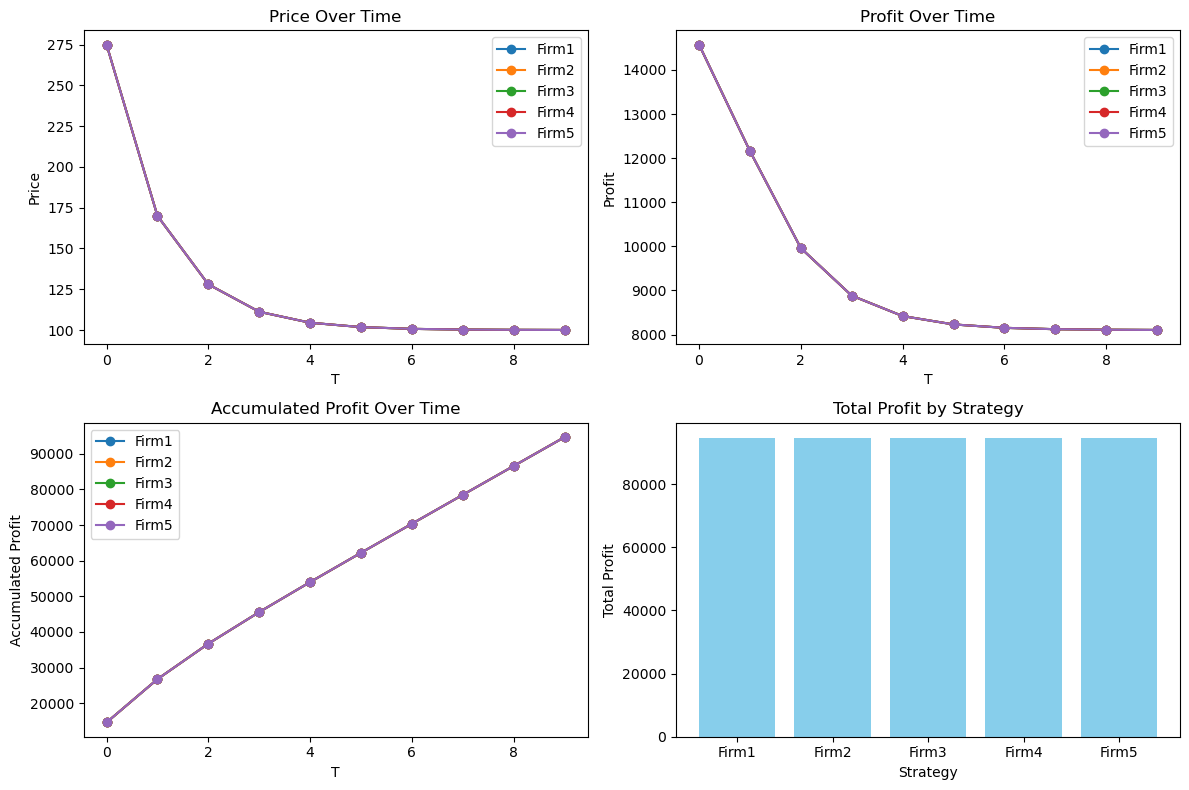

In [35]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

c = 10
p_nash = 100
p_monopoly = 275
strategy = ['Firm1','Firm2','Firm3','Firm4','Firm5']

def All_max(p_nash, p_monopoly, c,p_init):
    T = 10
    profit_matrix = np.zeros((5, T))  
    price_matrix = np.zeros((5, T))  
    accumulated_profit_matrix = np.zeros((5, T)) 

    p_list = p_init
    
    for i in range(5):
        profit_i = profit(i, p_list)
        if profit_i > 0:
            profit_matrix[i, 0] = profit_i
        price_matrix[i, 0] = p_list[i]
        accumulated_profit_matrix[i, 0] = profit_matrix[i, 0]

    for k in range(1, T):
        p_list = [max_profit(4, p_list),max_profit(4, p_list), max_profit(4, p_list), max_profit(4, p_list), max_profit(4, p_list)]
        for i in range(5):
            profit_i = profit(i, p_list)
            if profit_i > 0:
                profit_matrix[i, k] = profit_i
            price_matrix[i, k] = p_list[i]
            accumulated_profit_matrix[i, k] = accumulated_profit_matrix[i, k-1] + profit_matrix[i, k]

    return profit_matrix, price_matrix, accumulated_profit_matrix

# Run the simulation

def plot(p_init):
    profit_matrix, price_matrix, accumulated_profit_matrix = All_max(p_nash, p_monopoly, c,p_init)
    total_profit=[]
    for i in range (5):
        total_profit.append(np.sum(profit_matrix[i]))
# Plot Price Over Periods
    ig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Price Over Periods
    axs[0, 0].set_title("Price Over Time")
    for i in range(5):
        axs[0, 0].plot(np.arange(10), price_matrix[i],'-o', label=strategy[i])
    axs[0, 0].set_xlabel("T")
    axs[0, 0].set_ylabel("Price")
    axs[0, 0].legend(loc='upper right')

# Plot Profit Over Periods
    axs[0, 1].set_title("Profit Over Time")
    for i in range(5):
        axs[0, 1].plot(np.arange(10), profit_matrix[i], '-o', label=strategy[i])
    axs[0, 1].set_xlabel("T")
    axs[0, 1].set_ylabel("Profit")
    axs[0, 1].legend(loc='upper right')

# Plot Accumulated Profit Over Time
    axs[1, 0].set_title("Accumulated Profit Over Time")
    for i in range(5):
        axs[1, 0].plot(np.arange(10), accumulated_profit_matrix[i], '-o', label=strategy[i])
    axs[1, 0].set_xlabel("T")
    axs[1, 0].set_ylabel("Accumulated Profit")
    axs[1, 0].legend(loc='upper left')

# Plot Total Profit as a Bar Chart
    axs[1, 1].bar(strategy, total_profit, color='skyblue')
    axs[1, 1].set_title("Total Profit by Strategy")
    axs[1, 1].set_xlabel("Strategy")
    axs[1, 1].set_ylabel("Total Profit")

# Adjust the layout to prevent overlap
    plt.tight_layout()

# Show the plots
    plt.show()
p_init1=[p_monopoly, p_nash,p_monopoly,p_monopoly,p_nash]
p_init2=[p_monopoly, p_monopoly,p_monopoly,p_monopoly,p_monopoly]
print("Firm 2 and 5 play p_nash in T=1, rest firms play p_monopoly in T=1")
plot(p_init1)
print("All Firm play p_monopoly in T=1")
plot(p_init2)



All Firms play p_monopoly in T=1


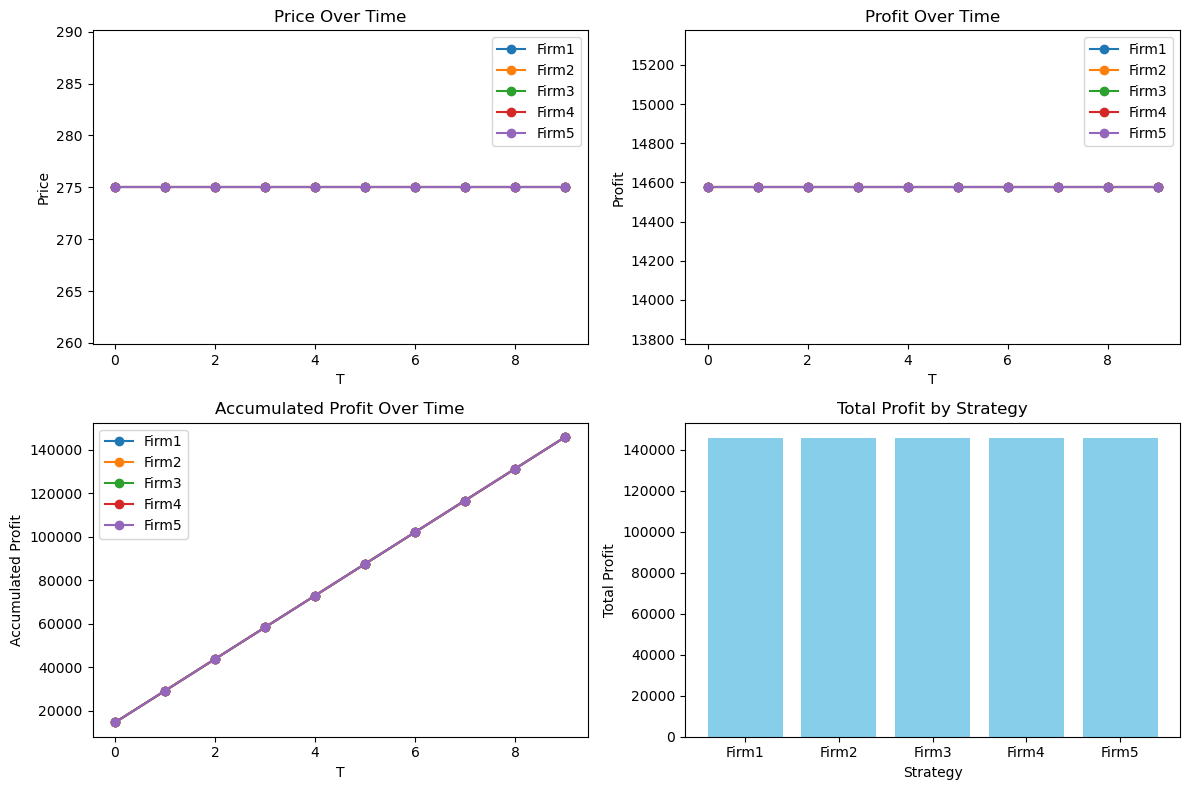

In [70]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

c = 10
p_nash = 100
p_monopoly = 275
strategy = ['Firm1','Firm2','Firm3','Firm4','Firm5']

def All_TFT(p_nash, p_monopoly, c, p_init):
    T = 10
    profit_matrix = np.zeros((5, T))  
    price_matrix = np.zeros((5, T))  
    accumulated_profit_matrix = np.zeros((5, T)) 

    p_list = p_init
    
    for i in range(5):
        profit_i = profit(i, p_list)
        if profit_i > 0:
            profit_matrix[i, 0] = profit_i
        price_matrix[i, 0] = p_list[i]
        accumulated_profit_matrix[i, 0] = profit_matrix[i, 0]

    for k in range(1, T):
        p_list = [TFT(p_list,0),TFT(p_list,1), TFT(p_list,2), TFT(p_list,3), TFT(p_list,4)]
        for i in range(5):
            profit_i = profit(i, p_list)
            if profit_i > 0:
                profit_matrix[i, k] = profit_i
            price_matrix[i, k] = p_list[i]
            accumulated_profit_matrix[i, k] = accumulated_profit_matrix[i, k-1] + profit_matrix[i, k]

    return profit_matrix, price_matrix, accumulated_profit_matrix

def plot(p_init):
    profit_matrix, price_matrix, accumulated_profit_matrix = All_TFT(p_nash, p_monopoly, c,p_init)
    total_profit=[]
    for i in range (5):
        total_profit.append(np.sum(profit_matrix[i]))
# Plot Price Over Periods
    ig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Price Over Periods
    axs[0, 0].set_title("Price Over Time")
    for i in range(5):
        axs[0, 0].plot(np.arange(10), price_matrix[i],'-o', label=strategy[i])
    axs[0, 0].set_xlabel("T")
    axs[0, 0].set_ylabel("Price")
    axs[0, 0].legend(loc='upper right')

# Plot Profit Over Periods
    axs[0, 1].set_title("Profit Over Time")
    for i in range(5):
        axs[0, 1].plot(np.arange(10), profit_matrix[i], '-o', label=strategy[i])
    axs[0, 1].set_xlabel("T")
    axs[0, 1].set_ylabel("Profit")
    axs[0, 1].legend(loc='upper right')

# Plot Accumulated Profit Over Time
    axs[1, 0].set_title("Accumulated Profit Over Time")
    for i in range(5):
        axs[1, 0].plot(np.arange(10), accumulated_profit_matrix[i], '-o', label=strategy[i])
    axs[1, 0].set_xlabel("T")
    axs[1, 0].set_ylabel("Accumulated Profit")
    axs[1, 0].legend(loc='upper left')

# Plot Total Profit as a Bar Chart
    axs[1, 1].bar(strategy, total_profit, color='skyblue')
    axs[1, 1].set_title("Total Profit by Strategy")
    axs[1, 1].set_xlabel("Strategy")
    axs[1, 1].set_ylabel("Total Profit")

# Adjust the layout to prevent overlap
    plt.tight_layout()

# Show the plots
    plt.show()

p_init2=[p_monopoly, p_monopoly,p_monopoly,p_monopoly,p_monopoly]
print("All Firms play p_monopoly in T=1")
plot(p_init2)


All Firms play p_monopoly in T=1


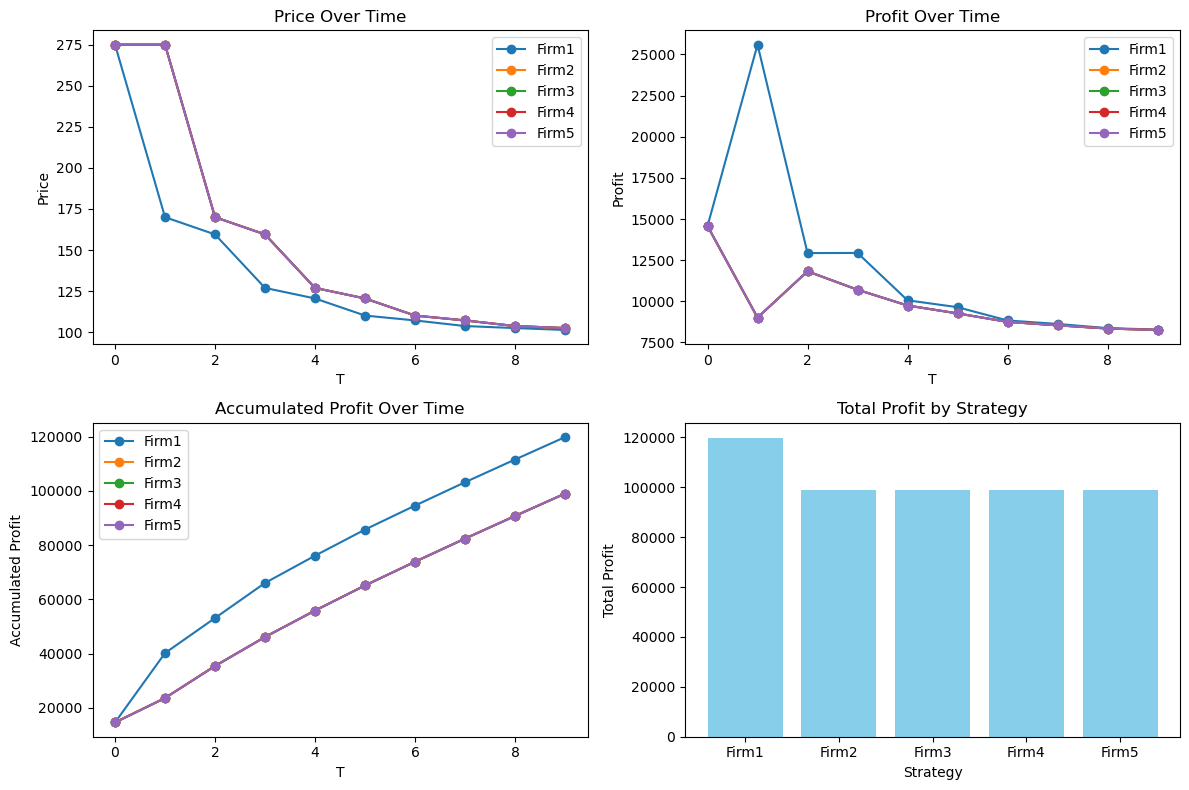

In [72]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

c = 10
p_nash = 100
p_monopoly = 275
strategy = ['Firm1','Firm2','Firm3','Firm4','Firm5']

def TFT_vs_Max(p_nash, p_monopoly, c, p_init):
    T = 10
    profit_matrix = np.zeros((5, T))  
    price_matrix = np.zeros((5, T))  
    accumulated_profit_matrix = np.zeros((5, T)) 

    p_list = p_init
    
    for i in range(5):
        profit_i = profit(i, p_list)
        if profit_i > 0:
            profit_matrix[i, 0] = profit_i
        price_matrix[i, 0] = p_list[i]
        accumulated_profit_matrix[i, 0] = profit_matrix[i, 0]

    for k in range(1, T):
        p_list = [max_profit(i, p_list),TFT(p_list,1), TFT(p_list,2), TFT(p_list,3), TFT(p_list,4)]
        for i in range(5):
            profit_i = profit(i, p_list)
            if profit_i > 0:
                profit_matrix[i, k] = profit_i
            price_matrix[i, k] = p_list[i]
            accumulated_profit_matrix[i, k] = accumulated_profit_matrix[i, k-1] + profit_matrix[i, k]

    return profit_matrix, price_matrix, accumulated_profit_matrix

def plot(p_init):
    profit_matrix, price_matrix, accumulated_profit_matrix = TFT_vs_Max(p_nash, p_monopoly, c, p_init)
    total_profit=[]
    for i in range (5):
        total_profit.append(np.sum(profit_matrix[i]))
# Plot Price Over Periods
    ig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Price Over Periods
    axs[0, 0].set_title("Price Over Time")
    for i in range(5):
        axs[0, 0].plot(np.arange(10), price_matrix[i],'-o', label=strategy[i])
    axs[0, 0].set_xlabel("T")
    axs[0, 0].set_ylabel("Price")
    axs[0, 0].legend(loc='upper right')

# Plot Profit Over Periods
    axs[0, 1].set_title("Profit Over Time")
    for i in range(5):
        axs[0, 1].plot(np.arange(10), profit_matrix[i], '-o', label=strategy[i])
    axs[0, 1].set_xlabel("T")
    axs[0, 1].set_ylabel("Profit")
    axs[0, 1].legend(loc='upper right')

# Plot Accumulated Profit Over Time
    axs[1, 0].set_title("Accumulated Profit Over Time")
    for i in range(5):
        axs[1, 0].plot(np.arange(10), accumulated_profit_matrix[i], '-o', label=strategy[i])
    axs[1, 0].set_xlabel("T")
    axs[1, 0].set_ylabel("Accumulated Profit")
    axs[1, 0].legend(loc='upper left')

# Plot Total Profit as a Bar Chart
    axs[1, 1].bar(strategy, total_profit, color='skyblue')
    axs[1, 1].set_title("Total Profit by Strategy")
    axs[1, 1].set_xlabel("Strategy")
    axs[1, 1].set_ylabel("Total Profit")

# Adjust the layout to prevent overlap
    plt.tight_layout()

# Show the plots
    plt.show()

p_init2=[p_monopoly, p_monopoly,p_monopoly,p_monopoly,p_monopoly]
print("All Firms play p_monopoly in T=1")
plot(p_init2)


All Firms play p_monopoly in T=1


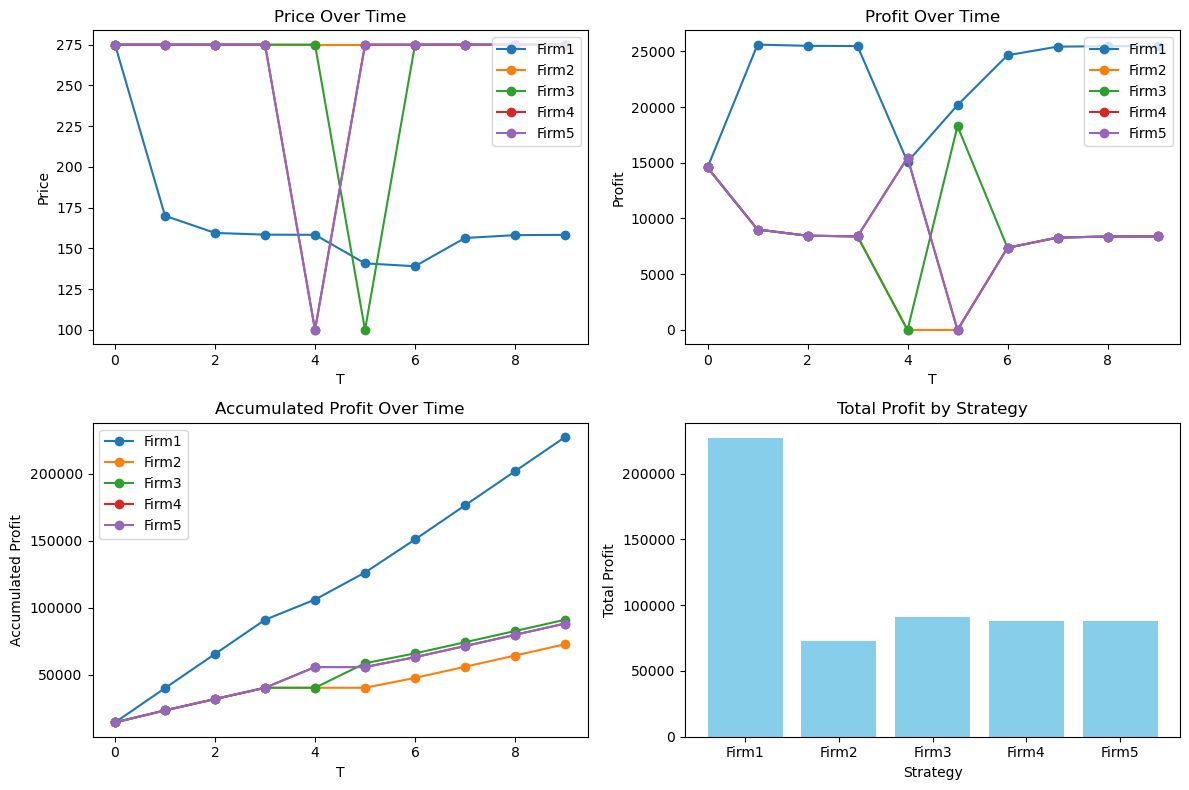

In [92]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

c = 10
p_nash = 100
p_monopoly = 275
strategy = ['Firm1','Firm2','Firm3','Firm4','Firm5']

def max_vs_AlT(p_nash, p_monopoly, c, p_init):
    T = 10
    profit_matrix = np.zeros((5, T))  
    price_matrix = np.zeros((5, T))  
    accumulated_profit_matrix = np.zeros((5, T)) 

    p_list = p_init
    
    for i in range(5):
        profit_i = profit(i, p_list)
        if profit_i > 0:
            profit_matrix[i, 0] = profit_i
        price_matrix[i, 0] = p_list[i]
        accumulated_profit_matrix[i, 0] = profit_matrix[i, 0]

    for k in range(1, T):
        p_list = [max_profit(i, p_list),AlT(),AlT(), AlT(), AlT()]
        for i in range(5):
            profit_i = profit(i, p_list)
            if profit_i > 0:
                profit_matrix[i, k] = profit_i
            price_matrix[i, k] = p_list[i]
            accumulated_profit_matrix[i, k] = accumulated_profit_matrix[i, k-1] + profit_matrix[i, k]

    return profit_matrix, price_matrix, accumulated_profit_matrix

def plot(p_init):
    profit_matrix, price_matrix, accumulated_profit_matrix = max_vs_AlT(p_nash, p_monopoly, c, p_init)
    total_profit=[]
    for i in range (5):
        total_profit.append(np.sum(profit_matrix[i]))
# Plot Price Over Periods
    ig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Price Over Periods
    axs[0, 0].set_title("Price Over Time")
    for i in range(5):
        axs[0, 0].plot(np.arange(10), price_matrix[i],'-o', label=strategy[i])
    axs[0, 0].set_xlabel("T")
    axs[0, 0].set_ylabel("Price")
    axs[0, 0].legend(loc='upper right')

# Plot Profit Over Periods
    axs[0, 1].set_title("Profit Over Time")
    for i in range(5):
        axs[0, 1].plot(np.arange(10), profit_matrix[i], '-o', label=strategy[i])
    axs[0, 1].set_xlabel("T")
    axs[0, 1].set_ylabel("Profit")
    axs[0, 1].legend(loc='upper right')

# Plot Accumulated Profit Over Time
    axs[1, 0].set_title("Accumulated Profit Over Time")
    for i in range(5):
        axs[1, 0].plot(np.arange(10), accumulated_profit_matrix[i], '-o', label=strategy[i])
    axs[1, 0].set_xlabel("T")
    axs[1, 0].set_ylabel("Accumulated Profit")
    axs[1, 0].legend(loc='upper left')

# Plot Total Profit as a Bar Chart
    axs[1, 1].bar(strategy, total_profit, color='skyblue')
    axs[1, 1].set_title("Total Profit by Strategy")
    axs[1, 1].set_xlabel("Strategy")
    axs[1, 1].set_ylabel("Total Profit")

# Adjust the layout to prevent overlap
    plt.tight_layout()

# Show the plots
    plt.show()

p_init2=[p_monopoly, p_monopoly,p_monopoly,p_monopoly,p_monopoly]
print("All Firms play p_monopoly in T=1")
plot(p_init2)
